# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.linalg as sp

def matrix(x0, m):
    x = np.array(x0)
    A = np.array([x**i for i in range(m)])
    A=A.T
    return A

def lst(x0, y, m): 
    A = matrix(x0, m)
    y = np.array(y)
    alfa = np.linalg.solve(A.T@A, A.T@y)
    return alfa

def ls(x0,beta):
    x = np.asarray(x0)
    y = np.zeros_like(x)
    for i in range(beta.size):
        y += (beta[i] * (x ** i))
    return y

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [3]:
prev=np.inf
for i in range(0,14):
    alfa = lst(x, y, i+1)
    sigma = 1/(len(x)-i)*np.sum((ls(x,alfa)-np.array(y))**2)
    if sigma-prev>=0:
        break
    prev = sigma
print(i-1)    

4


Предлагается апроксмиривать полиномом третьей степени

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

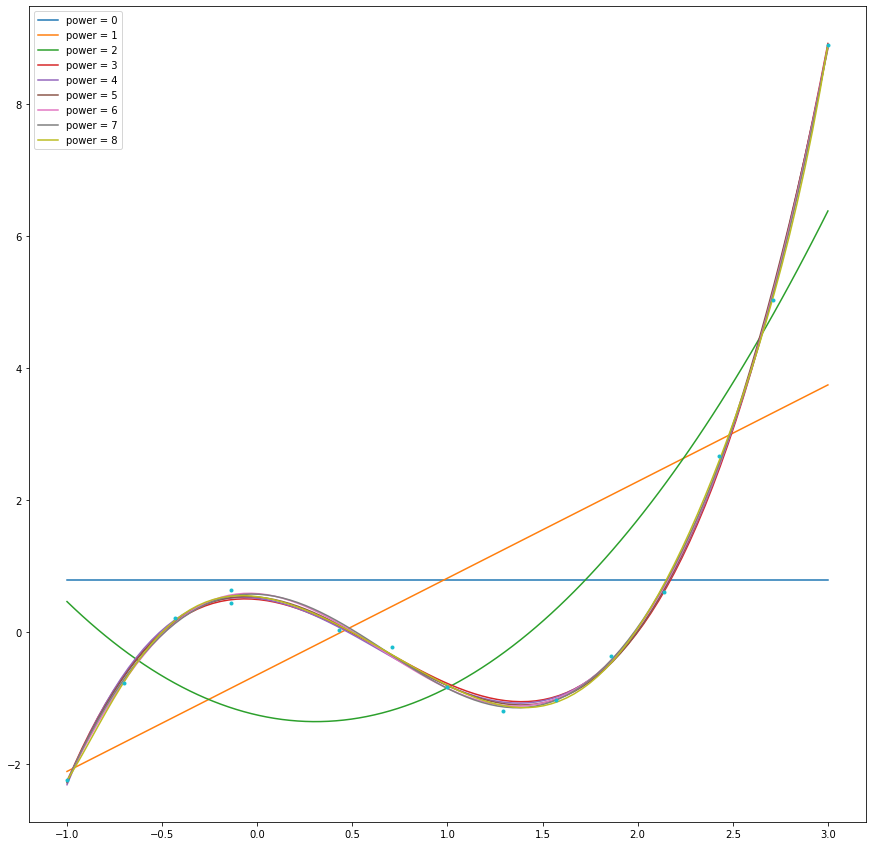

In [4]:
plt.figure(figsize=(15,15))
for i in range(1,10):
    alfa = lst(x,y,i)
    plt.plot(np.linspace(-1,3,100),ls(np.linspace(-1,3,100),alfa), label = "power = {}".format(i-1))
plt.plot(x,y,'.')
plt.legend()
plt.show()




Действительно, начиная с 3 степени, получаем хорошее приближение

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [5]:
q,r = np.linalg.qr(matrix(x, 4))
beta_qr = np.linalg.solve(r, q.T @ y)
print (((beta_qr - lst(x, y, 4))))

[-2.08721929e-14 -3.16413562e-15  3.68594044e-14 -1.22124533e-14]


Решения совпадают 

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

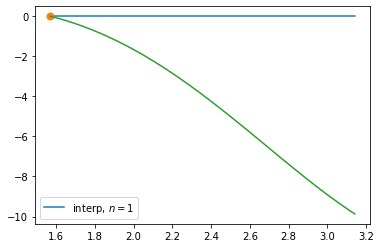

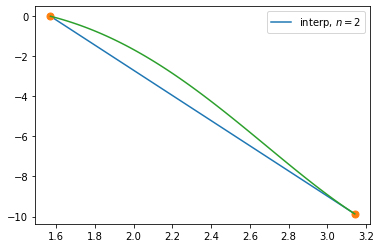

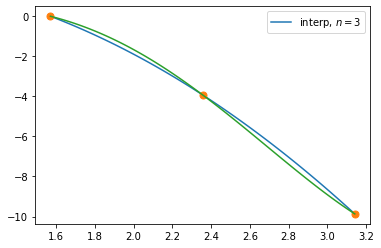

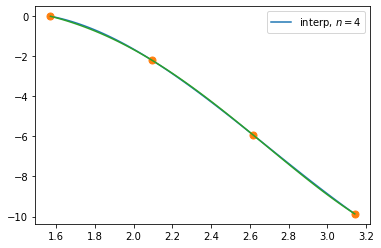

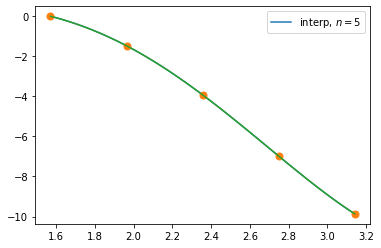

In [6]:
def f(x):
    return (x**2)*np.cos(x)

def lagrange1(value, xm, k):
    up, dwn = 1.0, 1.0 
    for j in range(len(xm)):
        if j == k: 
            continue
        dwn *= (xm[k] - xm[j])
        up *= (value - xm[j])
    return up / dwn
def lagrange(value, xm, ym):
    return sum(ym[k] * lagrange1(value, xm, k) for k in range(len(xm)))

def plot(xx, f):
    xn = np.linspace(np.pi/2, np.pi, 100)
    yn = [lagrange(_, xx, f(xx)) for _ in xn]
    
    plt.plot(xn, yn,'-',label=r'interp, $n= %s$' % len(xx))
    plt.plot(xx, f(xx), 'o', ms=7)
    plt.legend(loc='best')
xy = np.linspace(np.pi/2, np.pi, 100)    
for k in range(1,6):
    plot(np.linspace(np.pi/2, np.pi, k), f)
    plt.plot(xy, f(xy))
    plt.show()    

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

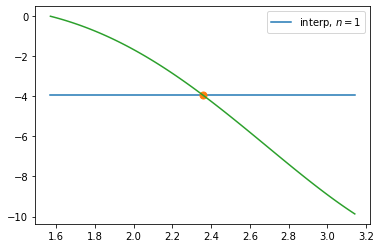

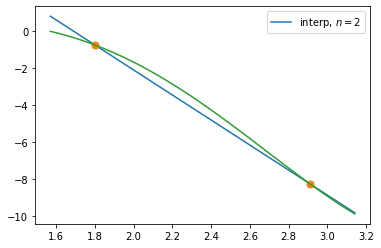

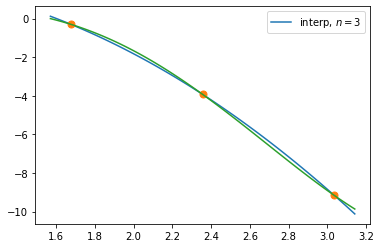

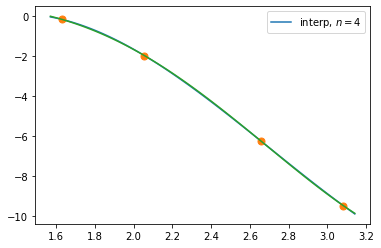

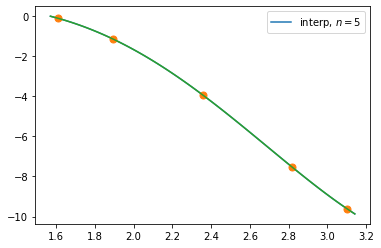

In [7]:
def cheb(k):
    return (np.pi/2+np.pi)/2 + (np.pi-np.pi/2)*np.cos((2*np.arange(1,k+1)-1)/2/k*np.pi)/2


for k in range(1,6):
    plot(cheb(k), f)
    plt.plot(xy, f(xy))
    plt.show()

Даже из графиков видно, что апроксимация Чебышевым поточнее